In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from analysis import *

plt.rcParams["figure.dpi"] = 300

In [2]:
# design momentum
P0C = 43.4e6

# dogleg dipole s locations
b1_entry = 1.0
b1_exit = 1.3
b2_entry = b1_exit + 1.502
b2_exit = b2_entry + 0.3
b3_entry = b2_exit + 1.405
b3_exit = b3_entry + 0.3
b4_entry = b3_exit + 1.502
b4_exit = b4_entry + 0.3

dogleg_dip_loc = [
    b1_entry, b1_exit, 
    b2_entry, b2_exit, 
    b3_entry, b3_exit, 
    b4_entry, b4_exit
    ]

In [3]:
# stats lims
sigma_lims= (0, 5)
epsilon_lims = (0, 100)

2.546126240277327e-05


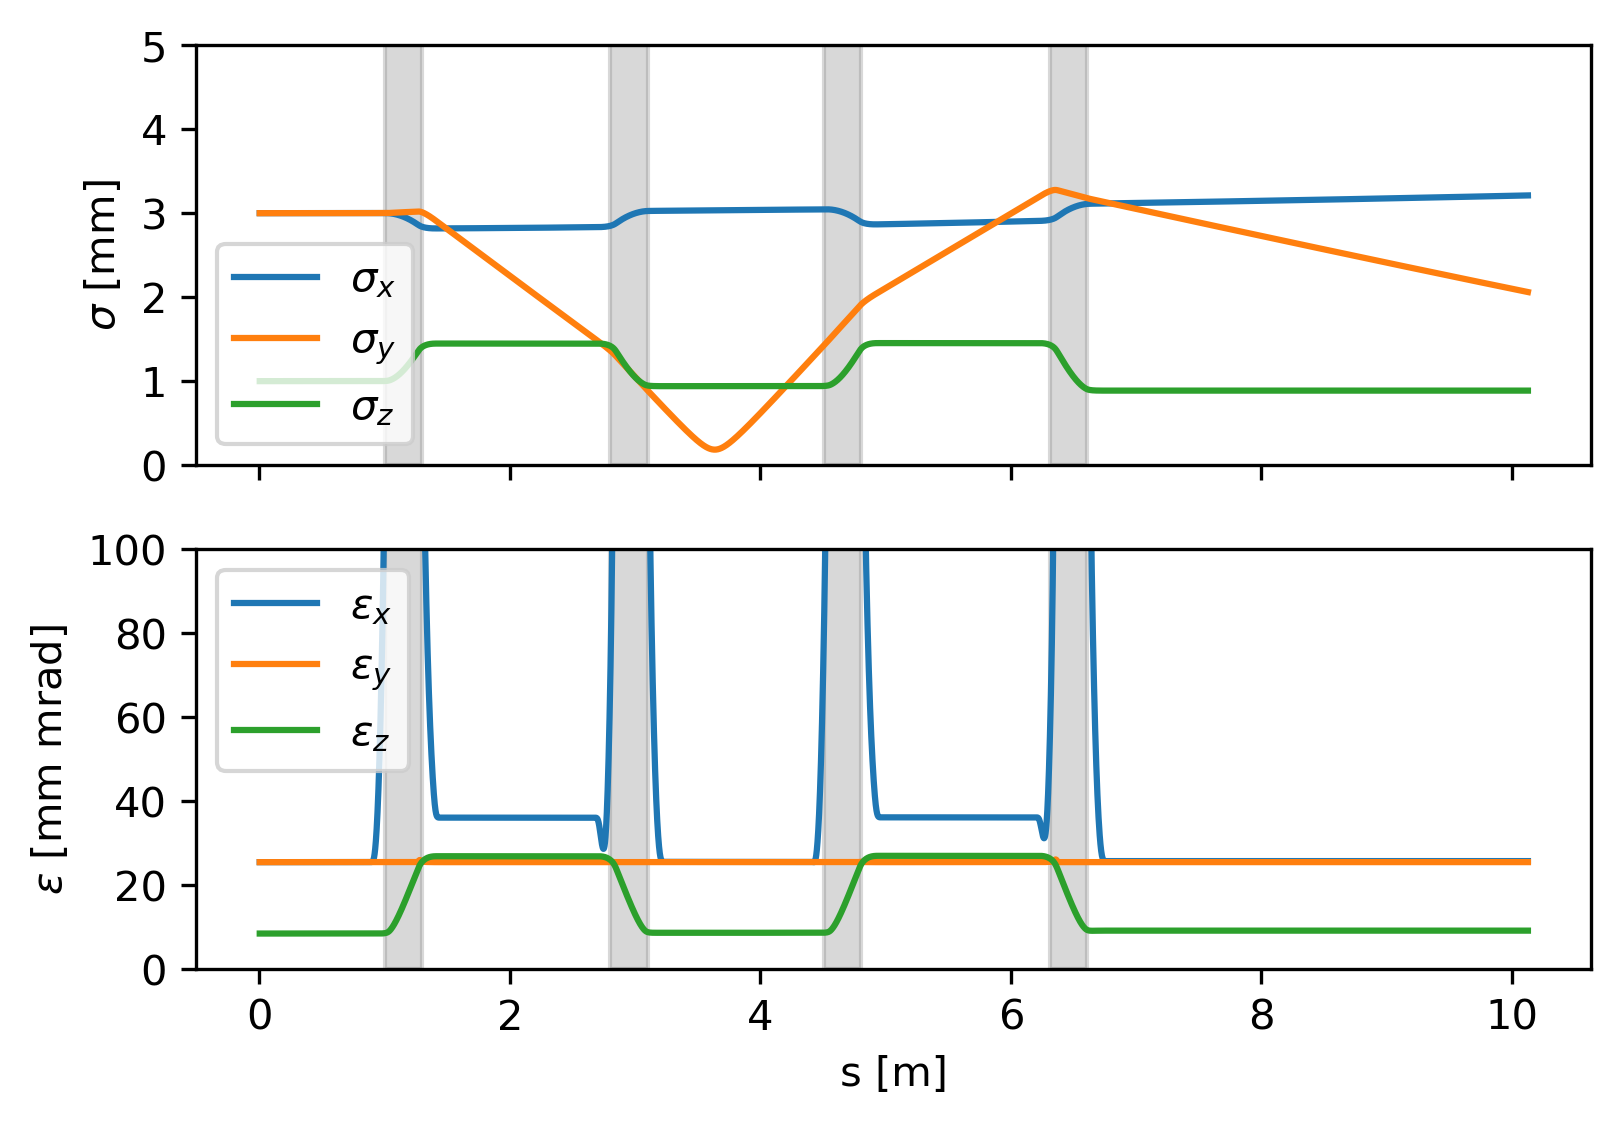

In [4]:
# dogleg csr off

csr_off_h5 = h5py.File('OPAL/dogleg_1e5par_1nc_csroff_3mm_p1mrad_p1mrad.h5', 'r')
csr_off_stats = get_stats(csr_off_h5)
fig, ax = plot_stats(csr_off_stats, sigma_lims, epsilon_lims, dogleg_dip_loc)
plt.show()
csr_off = last_step(csr_off_h5)
csr_off_par = opal_step_to_bmadx_particle(csr_off, P0C)

In [5]:
# dogleg csr on
csr_1nc_h5 = h5py.File('OPAL/dogleg_1e5par_1nc_csron_3mm_p1mrad_p1mrad.h5', 'r')
csr_1nc_stats = get_stats(csr_1nc_h5)
fig, ax = plot_stats(csr_1nc_stats, sigma_lims, epsilon_lims, dogleg_dip_loc)
plt.show()
csr_1nc = last_step(csr_1nc_h5)
csr_1nc_par = opal_step_to_bmadx_particle(csr_1nc, P0C)

2.5479463801457283e-05


In [6]:
# initial beam in bmadx coords
initial = first_step(csr_1nc_h5)
initial_par = opal_step_to_bmadx_particle(initial, P0C)  # initial particle

In [7]:
csr_1nc_par.p0c

43400000.0

In [8]:
# plots lims
z_lims = (-4, 4)
pz_lims = (-0.17, 0.10)
x_lims = (-15, 15)
px_lims= (-0.4, 0.5)

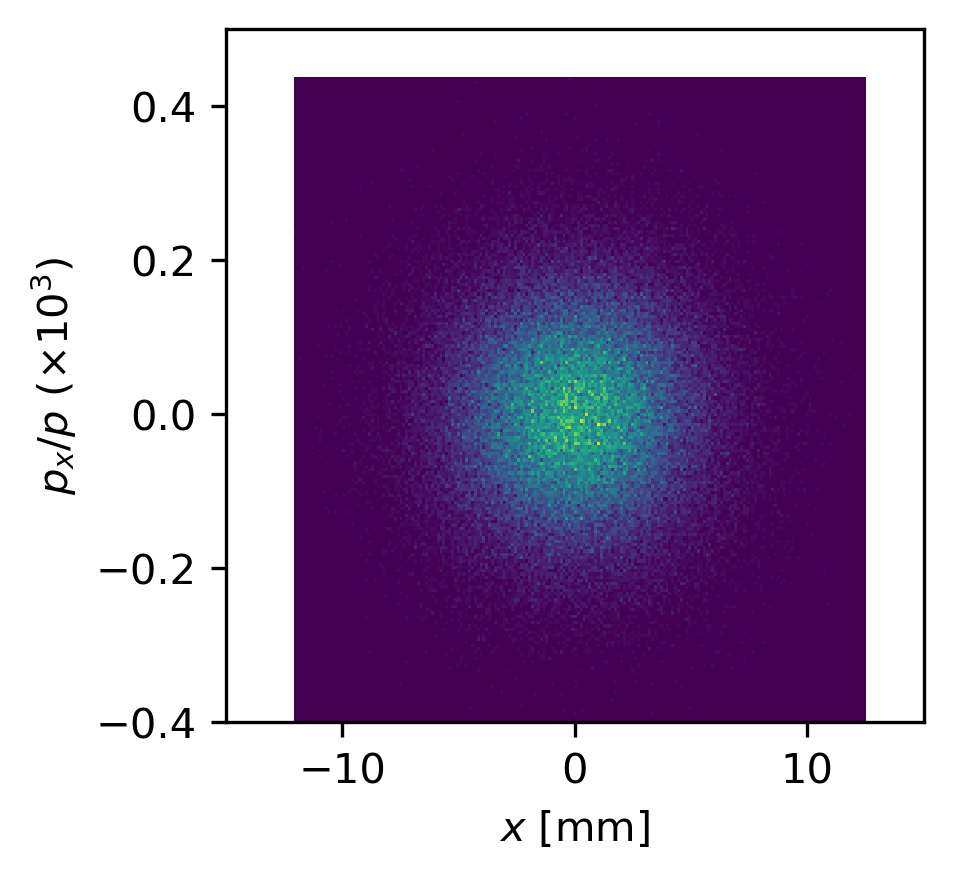

In [9]:
# plot initial beam long and hor phase space
fig, ax = plot_zpz(initial_par.z, initial_par.pz, z_lims, pz_lims)
plt.show()
fig, ax = plot_xpx(initial_par.x, initial_par.px, x_lims, px_lims)
plt.show()

In [10]:
# plot final beam CSR off
# plot initial beam long and hor phase space
fig, ax = plot_zpz(csr_off_par.z, csr_off_par.pz, z_lims, pz_lims)
plt.show()
fig, ax = plot_xpx(csr_off_par.x, csr_off_par.px, x_lims, px_lims)
plt.show()

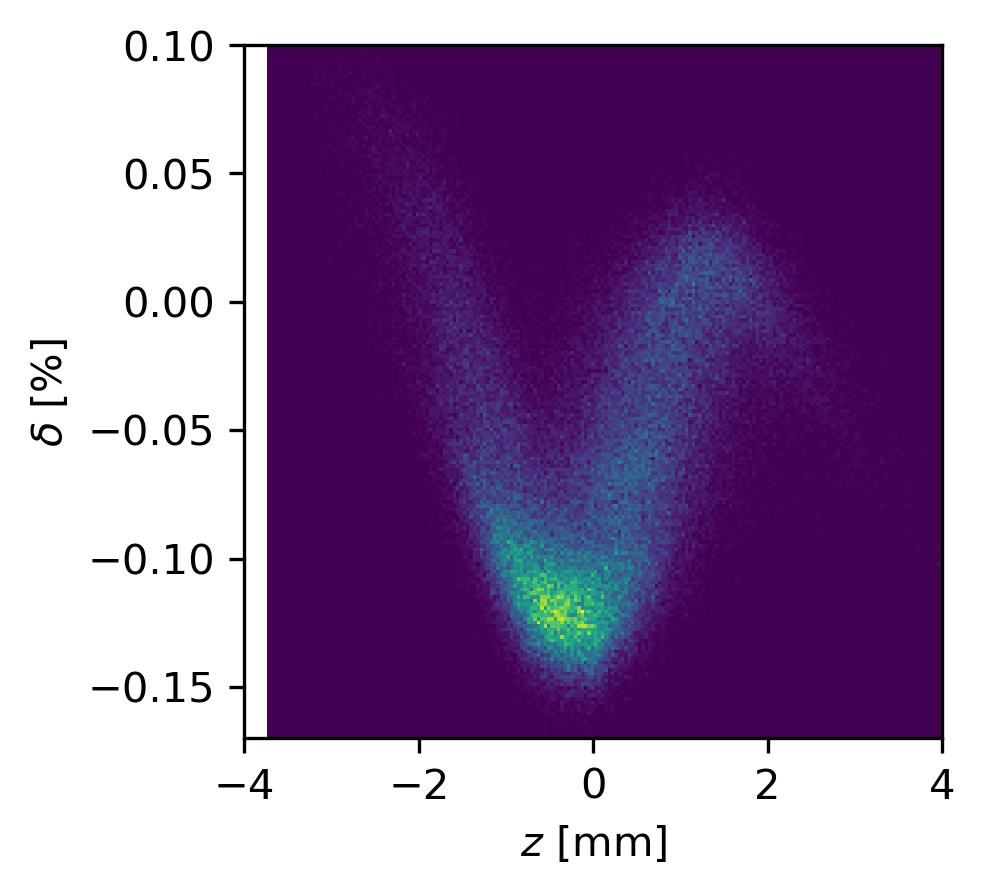

In [11]:
# plot final beam CSR on
fig, ax = plot_zpz(csr_1nc_par.z, csr_1nc_par.pz, z_lims, pz_lims)
plt.show()
fig, ax = plot_xpx(csr_1nc_par.x, csr_1nc_par.px, x_lims, px_lims)
plt.show()

In [12]:
# slicing params
n_slices = 11
z_min = csr_1nc_par.z.mean() - 2*csr_1nc_par.z.std()
z_max = csr_1nc_par.z.mean() + 2*csr_1nc_par.z.std()
z_slices = np.linspace(z_min, z_max, n_slices+1)
print(z_slices)

[-0.00185044 -0.00151399 -0.00117755 -0.00084111 -0.00050466 -0.00016822
  0.00016822  0.00050466  0.00084111  0.00117755  0.00151399  0.00185044]


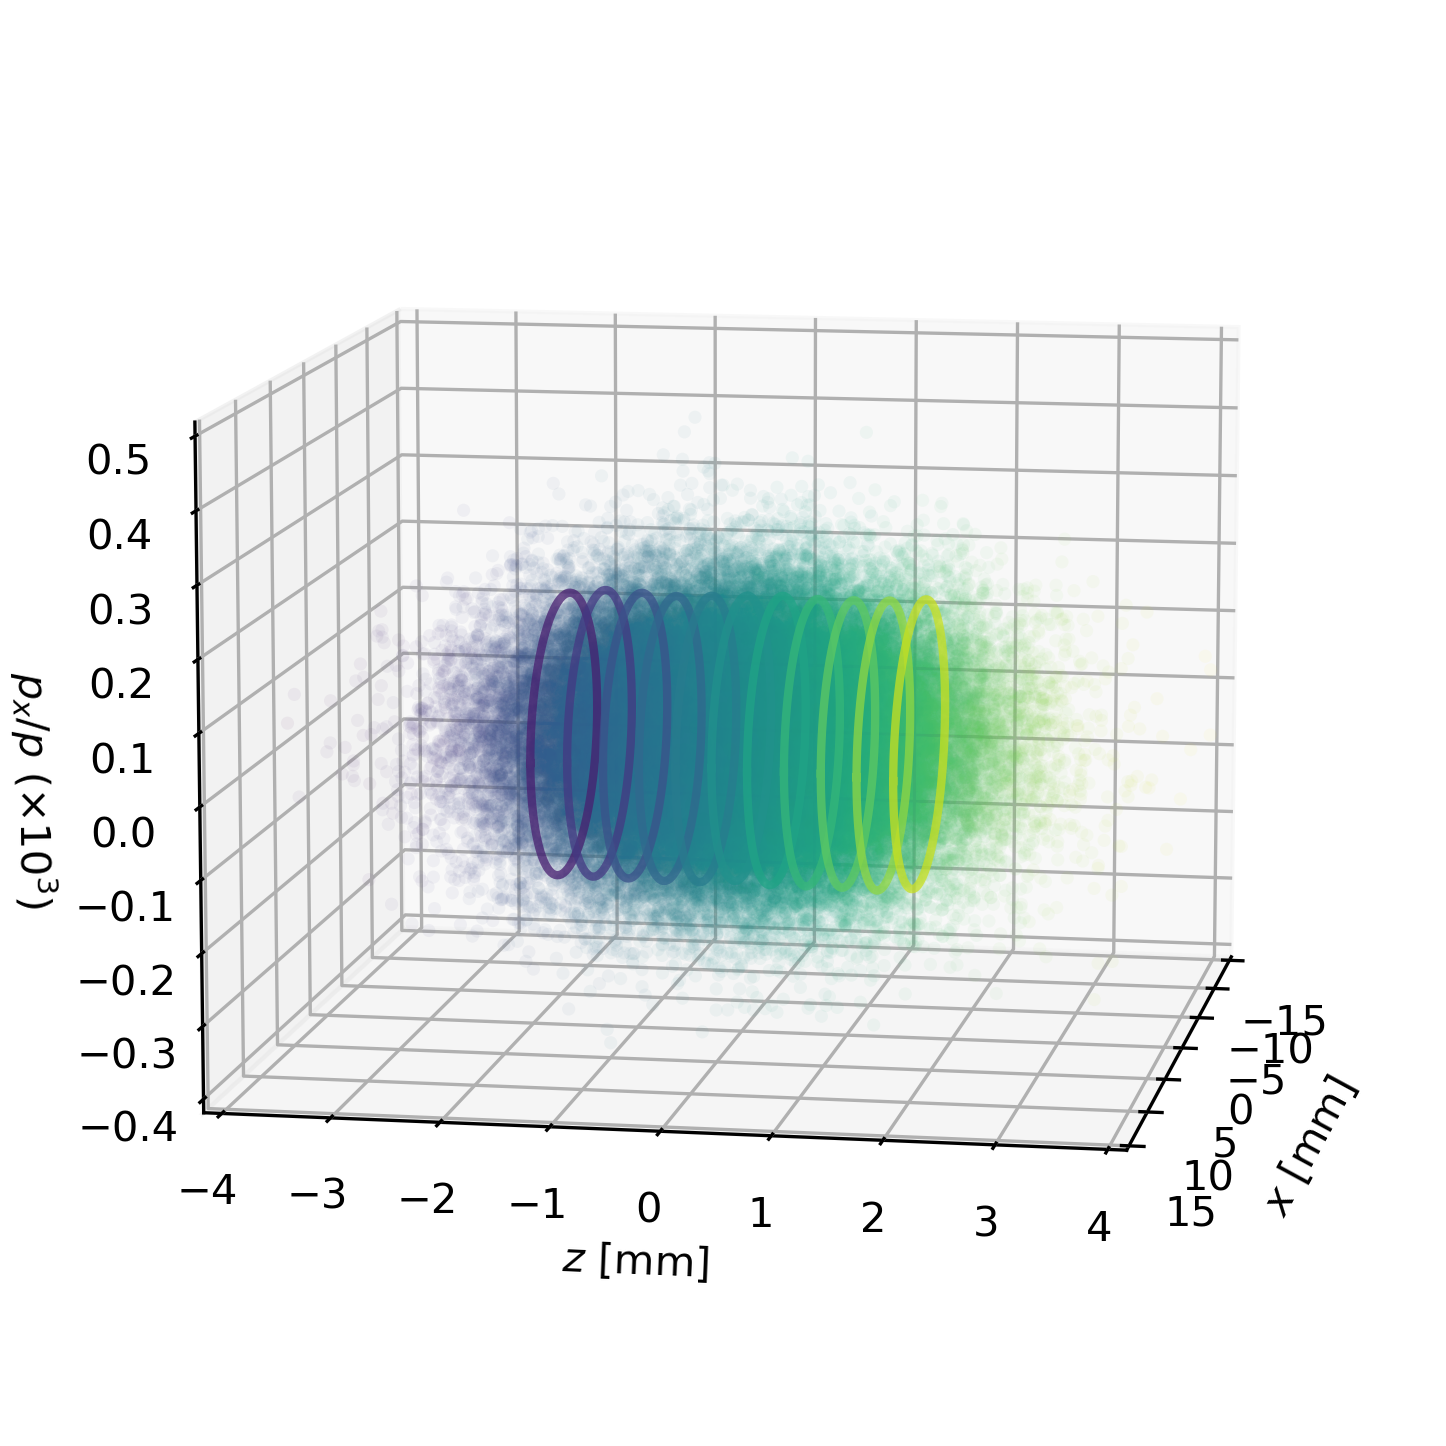

In [13]:
# plot initial beam sliced phase space
fig, ax = plot_sliced_ps_2d(initial_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(initial_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()


In [14]:
# plot final beam sliced phase space with CSR off
fig, ax = plot_sliced_ps_2d(csr_off_par, z_slices,  'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(csr_off_par, z_slices,  'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()

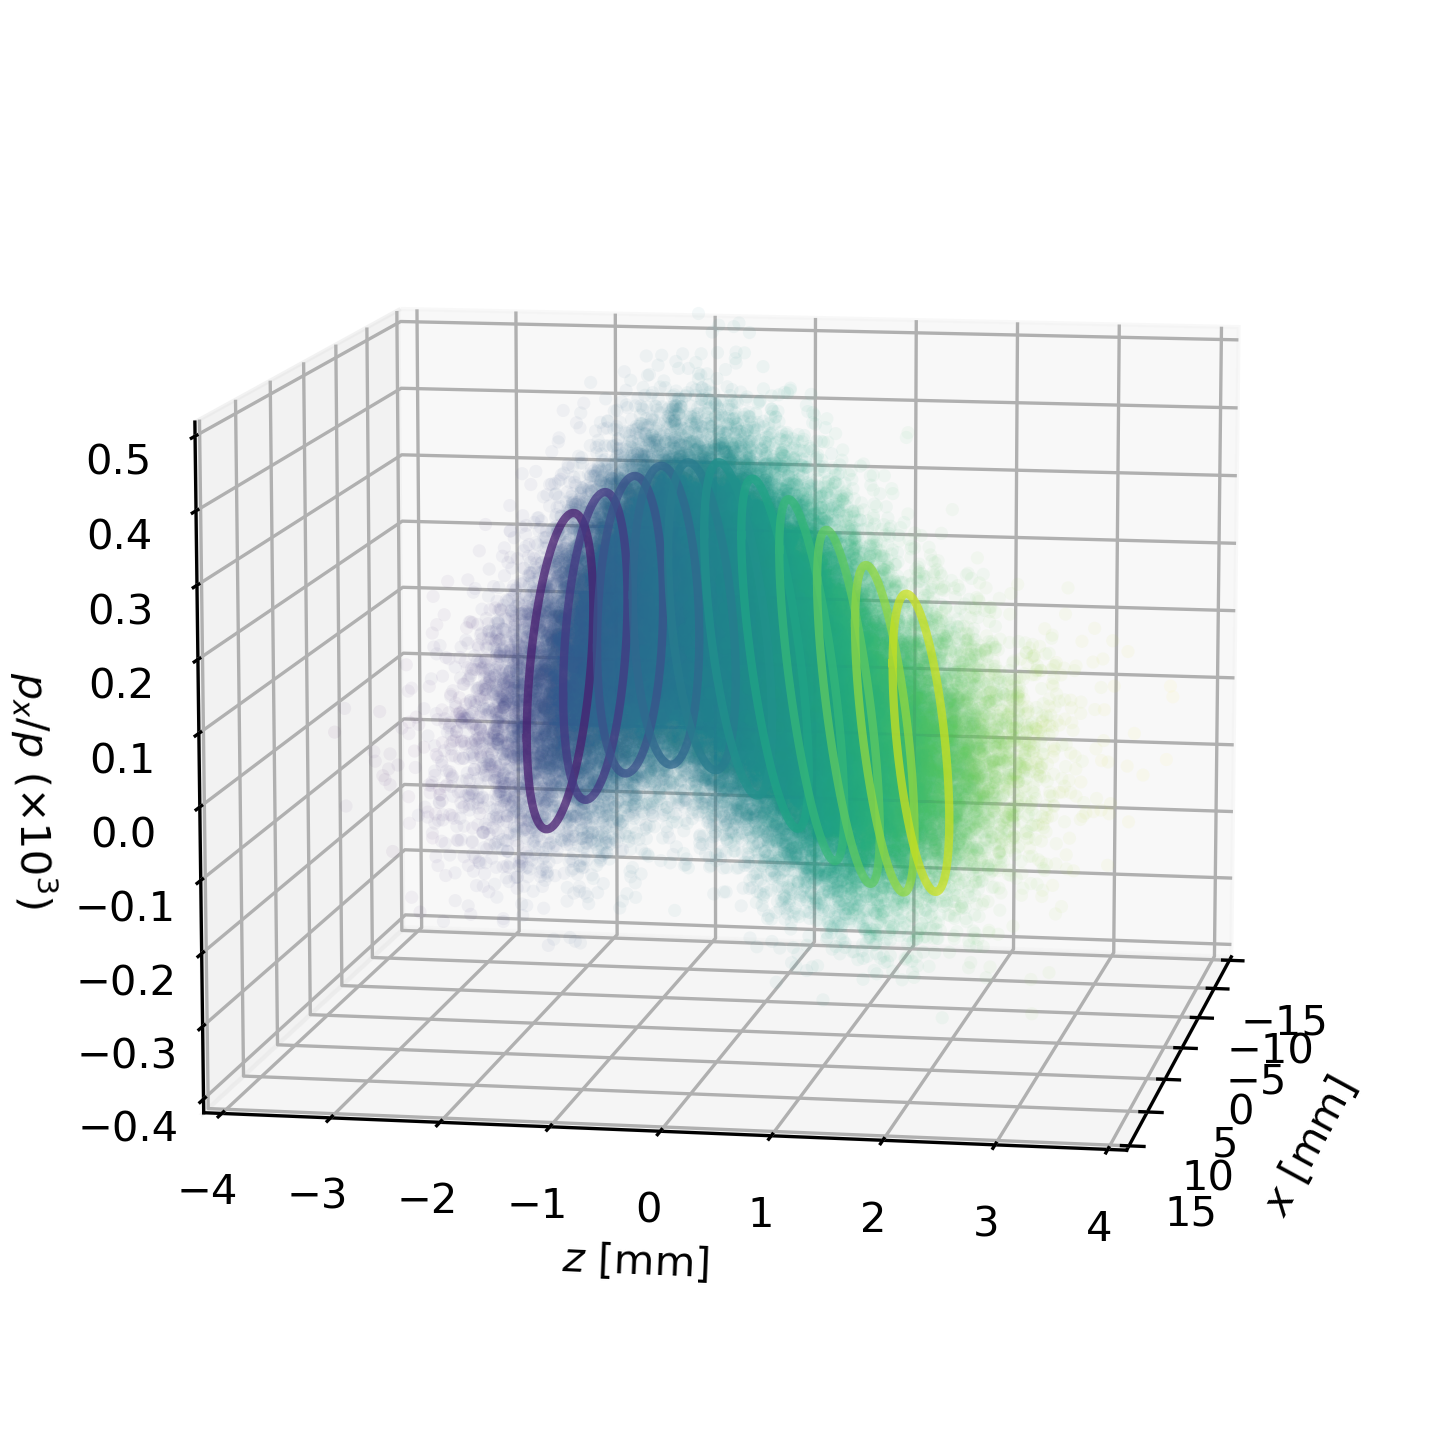

In [15]:
# plot final beam sliced phase space with CSR on
fig, ax = plot_sliced_ps_2d(csr_1nc_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(csr_1nc_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()

In [16]:
# save phase space after dogleg (just before diagnostics dipole)
#save_opal_last_beam(csr_1nc_h5, 'OPAL/dogleg_beam_1e5_3mm_p1mrad_p1mrad.data')

# save bmadx particle
#import pickle
#with open('OPAL/dogleg_beam_1e5_3mm_p1mrad_p1mrad.pkl', 'wb') as f:
#    pickle.dump(csr_1nc_par, f)

In [17]:
gamma = np.sqrt( 1 + (P0C / 0.511e6)**2)
gamma

84.93739374206895

In [18]:
emittance(csr_1nc_par, gamma)

(3.286749914002469e-05, 2.5491737978491468e-05, 3.649791829840456e-05)